Standart olan kütüphaneleri import etme, veri setlerini çağırma ve gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

3-BarPlot2 isimli dökümanda dikey barlar vardı ve x ekseni eyaletleri, y ekseni değerleri ifade ediyordu.

Şimdi ise y ekseni eyaletleri ve x ekseni Percentage of Races olacak şekilde yapalım.

Eyaletlerdeki ırkların oranını görselleştirelim. Mesela New York eyaletindeki asyalı insanların oranına bu görsel sayesinde rahatlıkla bakabiliriz. Bu işlem için share_race_city değişkeninde tutulan data'yı kullanacağız. Öncelikle bu data'nın içeriğine bakalım.

In [5]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


Çıktıyı inceleyelim.

Geographic area: Eyaletler bilgisini tutar.

City: Şehirler bilgisini tutar.

share_white: Beyaz insanlar bilgisini tutar.

share_black: Afrika kökenli Amerikalı insanların bilgisini tutar.

share_native_american: Yerli insanların bilgisini tutar.

share_asian: Asyalı insanların bilgisini tutar.

share_hispanic: İspanyol kökenli insanların bilgisini tutar.

Veri setinde amaçlarımız için düzeltmemiz gereken bir durum olup olmadığını anlamak için info() metodu sonucunu inceleyelim.

In [6]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


share_white, share_black, share_native_american, share_asian, share_hispanic sütunları oran tutmakta fakat veri tiplerinin string olduğu görülmekte. String tipini sayısal bir veri tipine çevirmeliyiz ki oransal bir sonuç elde edebilelim.

Öncelikle veri setini düzenleyelim. Veri seti içerisinde - ve (X) şeklinde değerler var. Bunların anlamı, doğru bir veri alınamadığı için boş veya veri yok anlamında - ve (X) değerleri konulmuş. Bizim bir oran bulmamız lazım dolayısıyla bu değerlerin yerine 0 yazmalıyız.

In [7]:
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)

In [8]:
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)

Yukarıda veri tipi string olan ve sayısal bir veri tipine dönüştürmemiz gereken sütunları float veri tipine çeviriyorum.

In [9]:
area_list = list(share_race_city['Geographic area'].unique())

Yukarıda eyaletlerden unique olanları buldum.

In [10]:
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

Her bir ırk için bir boş liste oluşturdum.

In [11]:
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

Oluşturduğum boş listeleri oranlar ile dolduruyorum. Oran, ilgili ırktaki insanların toplamının bu insanların sayısına bölümü ile elde edilir.

Veri setinde yazan oranlar o eyalete ait şehre göredir. Mesela AL eyaletinde Abanda CDP	isimli şehirde 67.2	oranındadır. Biz şehirlere göre değil eyaletlere göre yaptığımız için o eyalete ait ilgili ırkın tüm oranların ortalamasını bulmalıyız. 

Yukarıdaki kod bloğu ile yapılan da eyaletlere göre oranları bulma işlemidir.

Buraya kadar "Eyaletlerdeki ırkların oranı" probleminin cevabını elde ettik. Şimdi elde ettiğimiz cevabı görselleştirelim.

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

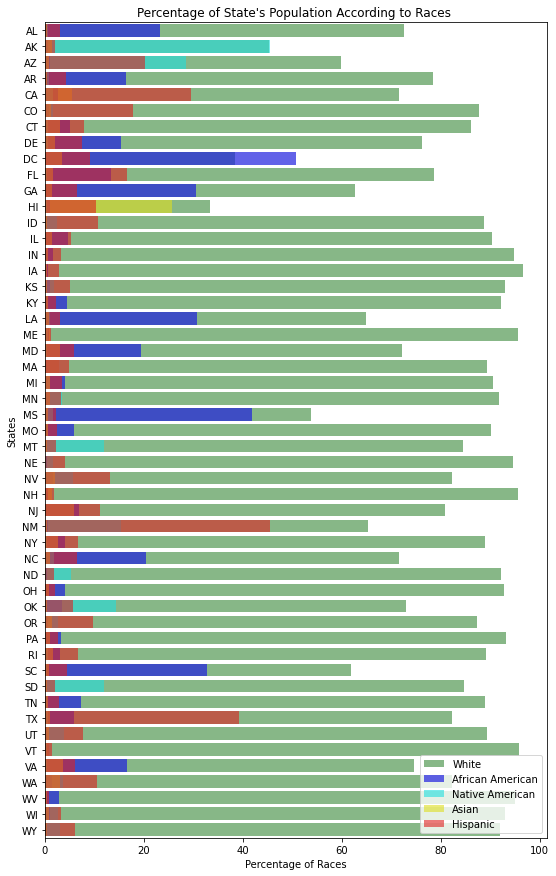

In [12]:
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin görünürlüğü
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

Yukarıdaki blokta yapılanlar şu şekildedir:

x ekseninin uzunluğu 9 ve y ekseninin uzunluğu 15 olan bir figür oluşturdum.

sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' ) satırı ile yapılan, x eksenine share_white 'ların oranını ve y eksenine area_list (eyaletler) 'lerin oranını koydum. Bu bar plot'un rengini yeşil yaptım. Bu rengin saydamlığını alpha=0.5 parametresi ile belirledim. label='White' parametresi ile yeşil renkteki barlaya white isminde etiket verdim. Bu satır figür üzerinde gördüğünüz yeşil barların hepsini çiziyor.

Bu satırın altındaki 4 satırda da diğer ırklar için aynı işlemleri yaptım.

ax.legend(loc='lower right',frameon = True) satırı: ledeng, figürün sağ alt köşesinde gördüğünüz label'ların bulunduğu küçük kutudur. Bu kutunun lokasyonunun loc='lower right' parametresi ile sağ alt köşe olmasını sağladım. frameon = True parametresi ile label'ları ifade eden yazıların arkasındaki beyaz kutunun görünmesini sağladım. Bu parametreyi False değerine eşitlerseniz, sadece label'ları ifade eden yazılar görünür ve arkalarındaki beyaz kutu görünmez.

ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ") satırı ile x eksenini, y eksenini ve figürün başlığını temsil eden ifadeleri ekledim.

Çıktıyı inceleyelim. AL'de mavi, kırmızı ve yeşil renkleri var. Yeşil rengi beyaz insanları, mavi rengi Afrika kökenli insanları ve kırmızı rengi ispanyol kökenli insanları temsil etmekte. AL eyaletinde en çok beyaz insanların, sonra Afrika kökenli insanların ve en az da ispanyol kökenli insanların olduğunu görebilmekteyiz.

Böylelikle eyaletlerin ırklarının oranlarını görsel olarak kolaylıkla analiz edebilmemiz mümkün.